__Utilizar lo que hemos visto hasta ahora de Julia para:__

1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raíz.
 __(Tip: Si tienen un arreglo con todas las $x_k$'s que arrojó el método, digamos _list_, prueben hacer directamente $(list-S)/S$ )__.
    * Hacer lo mismo usando el método de bisección para $p_k$.
    
2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones __(Noten que aqui solo nos interesa la última iteración!, como lo hicieron en los primeros ejercicios)__:
    * Que tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser `metodo_newton(f,df,x0)`. El _output_ debe ser alguna raíz.
    * Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un rango amplio de condiciones iniciales, por ejemplo costruido con `linspace`. Es muy probable que funcione llamando la funcion que crearon como `metodo_newton.(f,df,x)`. Si no funciona la sintaxis creen una rutina solo para vectores, que seria lo previo al siguiente punto. El _ouput_ debe ser un arreglo donde las entradas son raices, no importa que estén repetidas. __Nota:__ Las funciones se pasan a la rutina SIN argumento, es decir solo como (por ej.) `metodo(f)`.
    * Crear la misma rutina, pero que esta vez solo reciba un rango amplio de condiciones iniciales (objetos `linspace`) y que revise el arreglo despues de $200$ iteraciones y solo tome las raices diferentes hasta cierto $\epsilon$. Aquí pueden usar `push!` para ir guardando las raíces en un vector inicializado como (por ej.) `t=[]`. El _output_ tiene que ser precisamente `t`. 
    * (__Lean bien este paso!__) Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los _inputs_ de la función del método sean solamente la función y la condición inicial.
        * Para esto deberán usar lo que aprendimos de SymPy y como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.
        * La función que reciba esta rutina debe ser de `Julia`, para la derivada pueden usar `SymPy` internamente, recuerden que es facil convertir funciones de `Julia` en funciones simbolicas evaluandolas en variables simbolicas; para regresarlas a funciones de `Julia` e iterarlas, consulten la parte donde vimos la función `lambdify`. 
        
__Nota:__ Se resolveran dudas de esta tarea el Martes 29, así que traten de avanzar para que surjan dudas.


In [1]:
using PyPlot

In [6]:
f(x)=x^3-x^2-x-1
derivada(x)=3x^2-2x-1

derivada (generic function with 1 method)

In [7]:

function raiz(inicial)
    list=zeros(30)
    x=inicial
    for i in 1:30
        x=x-(f(x)/derivada(x))
        list[i]=x;
    end
    return list
end

raiz (generic function with 1 method)

In [29]:
list1=raiz(0.1);
list2=raiz(2);
list3=raiz(4);
list4=raiz(5);
listn = 1: length(list4)

1:30

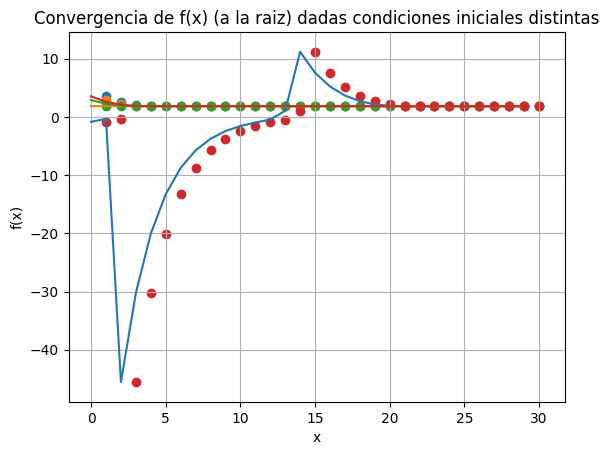

In [55]:
#yscale("symlog", linthreshy=0.05)
plot(real(list1))
plot(real(list2))
plot(real(list3))
plot(real(list4))
PyPlot.scatter(listn,list4)
PyPlot.scatter(listn,list3)
PyPlot.scatter(listn,list2)
PyPlot.scatter(listn,list1)

xlabel("x")
ylabel("f(x)")
title("Convergencia de f(x) (a la raiz) dadas condiciones iniciales distintas")
grid("on")
show();


Grafiquemos ahora el error relativo a la raiz, es decir:
$$\frac{x_k-S}{S}$$

In [70]:
List5=(list1-0.1)/0.1;
List6=(list2-2)/2;
List7=(list3-4)/4;
List8=(list4-6)/5;

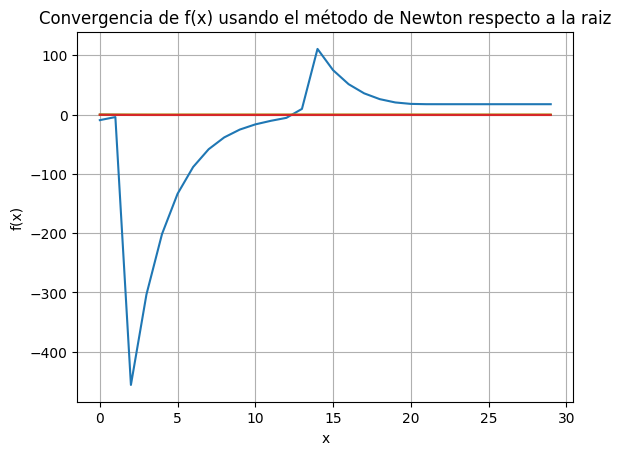

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4bc9f3a350>

In [71]:
xlabel("x")
ylabel("f(x)")
title("Convergencia de f(x) usando el método de Newton respecto a la raiz")
grid("on")
plot(real(List5))
plot(real(List6))
plot(real(List7))
plot(real(List8))


Hagamos un zoom a donde converge cambiando el dominio de la gráfica en y usando $ylim(,)$

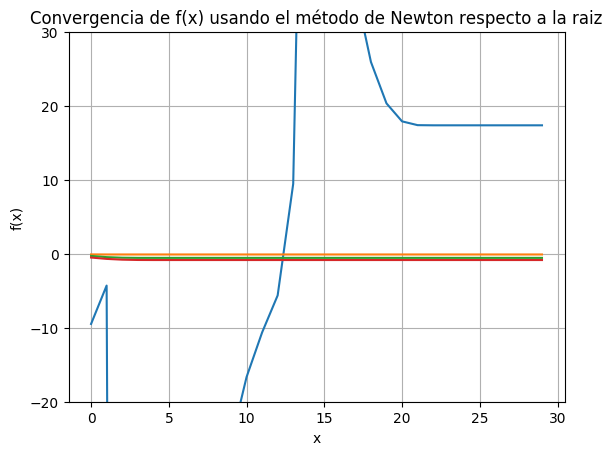

In [72]:
xlabel("x")
ylabel("f(x)")
title("Convergencia de f(x) usando el método de Newton respecto a la raiz")
grid("on")
plot(real(List5))
plot(real(List6))
plot(real(List7))
plot(real(List8))
ylim(-20,30)

show();

Usemos ahora el método de ** La Bisección **

In [73]:
function bisec(a,b)
    p = (a+b)/2
    f(x) = x^3-x^2-x-1
    for i in 1:100
        if  f(a)*f(p) > 0
            a = p
        end
        
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
    end
    return p,f(p)
end;

Definamos los intervalos para cada condición inicial.

In [74]:
list9=biseccion(1.0, 2.0);
list10=biseccion(10.0, 20.0);
list11=biseccion(-30.0, 30.0);
list12=biseccion(-0.1, 0.1);

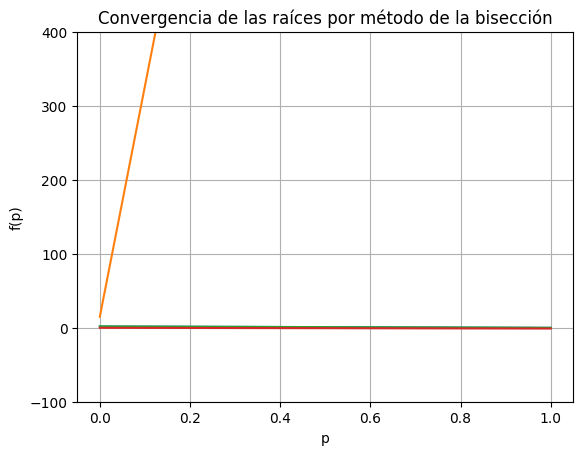

In [75]:
xlabel("p")
ylabel("f(p)")
title("Convergencia de las raíces por método de la bisección")
grid("on")
plot(list9)
plot(list10)
plot(list11)
plot(list12)

ylim(-100,400)

show();

# Parte II Implementación del método de Newton para funciones arbitrarias

Añadamos la paquetería necesaria

In [77]:
Pkg.add("SymPy")

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [79]:
using SymPy;